In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv("StudentsPerformance.csv")
data.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
data.columns = ["Gender", "Race", "Parent_educ", "Lunch", "Test_prep_course", "Math_score", "Reading_score", "Writing_score"]

In [6]:
data.head()

,Gender,Race,Parent_educ,Lunch,Test_prep_course,Math_score,Reading_score,Writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.describe()

,Math_score,Reading_score,Writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Race              1000 non-null   object
 2   Parent_educ       1000 non-null   object
 3   Lunch             1000 non-null   object
 4   Test_prep_course  1000 non-null   object
 5   Math_score        1000 non-null   int64 
 6   Reading_score     1000 non-null   int64 
 7   Writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Checking to see if there is any missing data
data.isnull().sum()

Gender              0
Race                0
Parent_educ         0
Lunch               0
Test_prep_course    0
Math_score          0
Reading_score       0
Writing_score       0
dtype: int64

## Dashboard Comparing Distributions

In [23]:
print("Course completed:", sum(data.Test_prep_course=="completed"))
print("Course not completed:", sum(data.Test_prep_course=="none"))

Course completed: 358
Course not completed: 642


<BarContainer object of 2 artists>

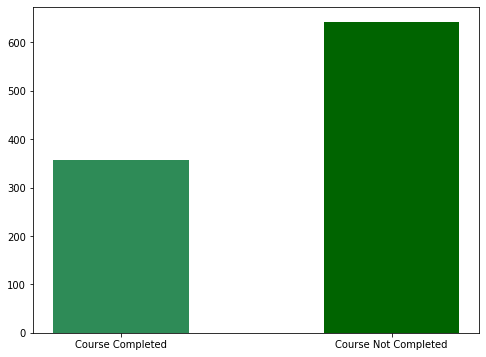

In [24]:
#Visualising the test preperation course split

plt.figure(figsize=(8,6))

plt.bar(x=["Course Completed", "Course Not Completed"], height=([358,642]), width=0.5, color=["seagreen", "darkgreen"])

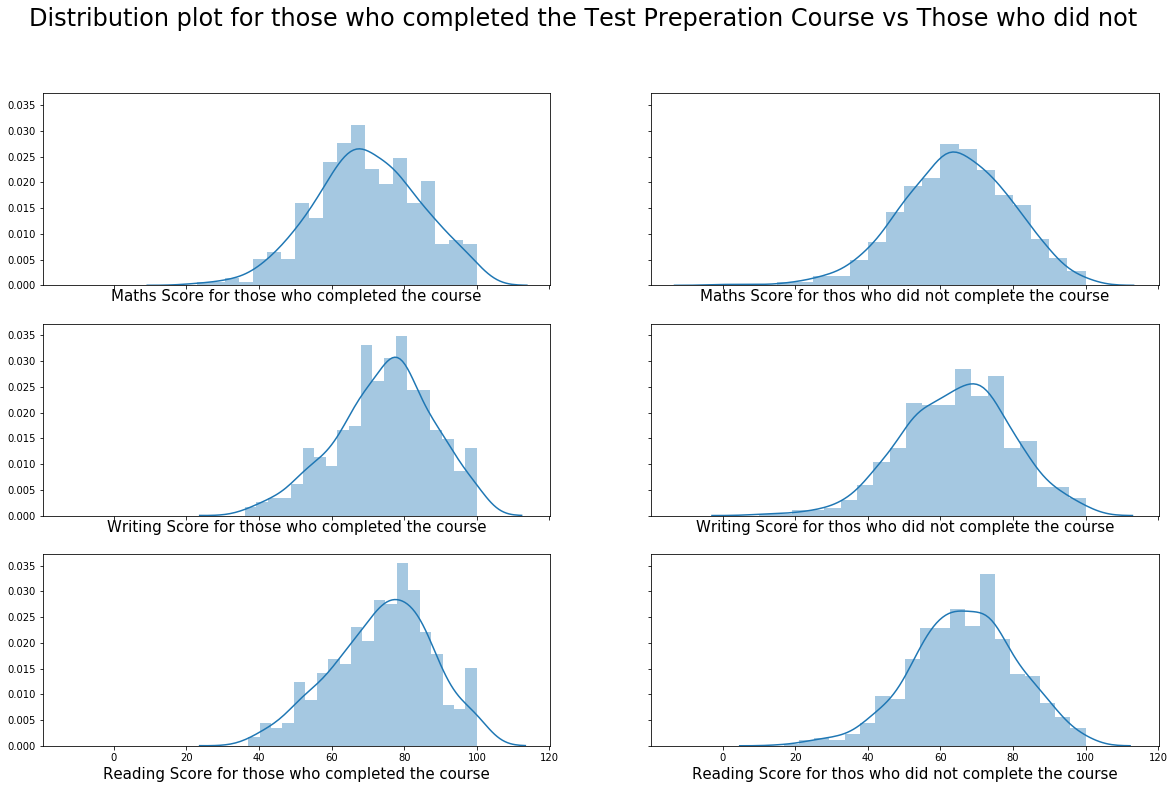

In [25]:
f, axes2 = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(20,12))

dist1 = sns.distplot(data["Math_score"].where(data.Test_prep_course == "completed"), bins=20, ax=axes2[0,0])
dist1.set_xlabel("Maths Score for those who completed the course", size=15)
dist2 = sns.distplot(data["Math_score"].where(data.Test_prep_course == "none"), bins=20, ax=axes2[0,1])
dist2.set_xlabel("Maths Score for thos who did not complete the course", size=15)


dist3 = sns.distplot(data["Writing_score"].where(data.Test_prep_course == "completed"), bins=20, ax=axes2[1,0])
dist3.set_xlabel("Writing Score for those who completed the course", size=15)
dist4 = sns.distplot(data["Writing_score"].where(data.Test_prep_course == "none"), bins=20, ax=axes2[1,1])
dist4.set_xlabel("Writing Score for thos who did not complete the course", size=15)

dist5 = sns.distplot(data["Reading_score"].where(data.Test_prep_course == "completed"), bins=20, ax=axes2[2,0])
dist5.set_xlabel("Reading Score for those who completed the course", size=15)
dist6 = sns.distplot(data["Reading_score"].where(data.Test_prep_course == "none"), bins=20, ax=axes2[2,1])
dist6.set_xlabel("Reading Score for thos who did not complete the course", size=15)

f.suptitle("Distribution plot for those who completed the Test Preperation Course vs Those who did not", size=24)
plt.show()

### Barplot by Race/Ethinicity

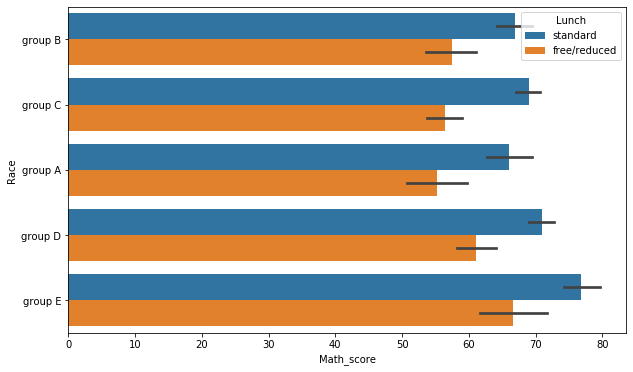

In [26]:
plt.figure(figsize=[10,6])

sns.barplot(x=data.Math_score, y=data.Race, hue=data.Lunch)

### Boxplots - Test Score categorised by Parents Education level

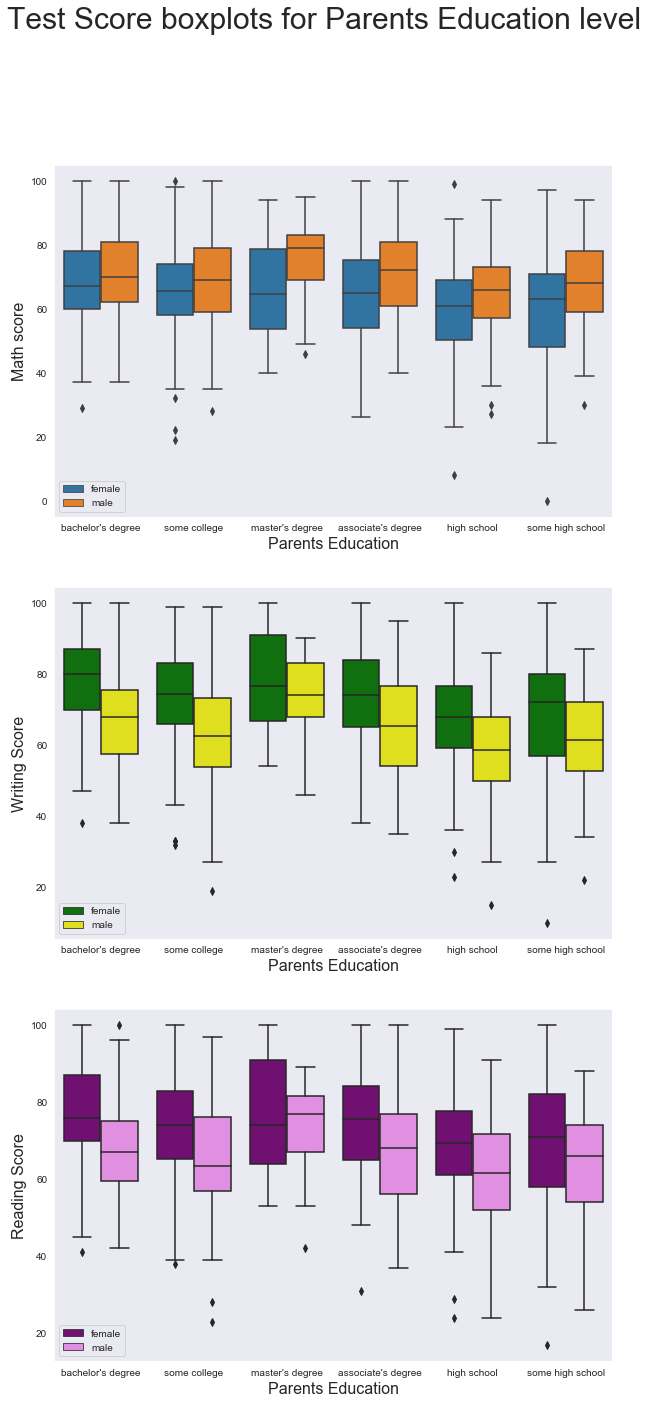

In [43]:
sns.set_style("dark")

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,22))

ax1 = sns.boxplot(x=data.Parent_educ, y=data.Math_score, hue=data.Gender, ax=axes[0])
ax2 = sns.boxplot(x=data.Parent_educ, y=data.Writing_score, hue=data.Gender, palette=("green","yellow"), ax=axes[1])
ax3 = sns.boxplot(x=data.Parent_educ, y=data.Reading_score, hue=data.Gender, palette=("purple","violet"), ax=axes[2])

ax1.legend(loc = "lower left")
ax1.set_xlabel("Parents Education", size=16)
ax1.set_ylabel("Math score", size=16)

ax2.legend(loc = "lower left")
ax2.set_xlabel("Parents Education", size=16)
ax2.set_ylabel("Writing Score", size=16)

ax3.legend(loc = "lower left")
ax3.set_xlabel("Parents Education", size=16)
ax3.set_ylabel("Reading Score", size=16)

f.suptitle("Test Score boxplots for Parents Education level", size=30)

plt.show()

### Kernel Density Plots

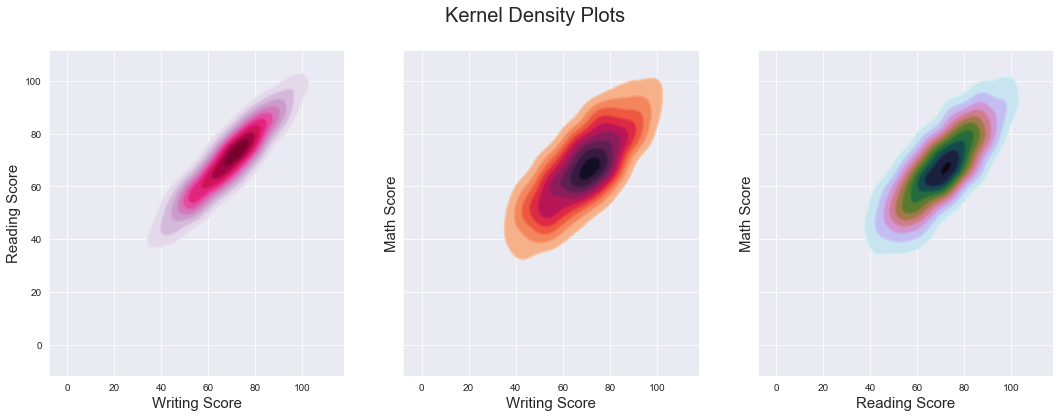

In [44]:
sns.set_style("darkgrid")
f, axes1 = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,6))

k1 = sns.kdeplot(data.Writing_score, data.Reading_score, shade=True, cmap='PuRd',
                 shade_lowest=False, ax=axes1[0])
k1b = sns.kdeplot(data.Writing_score, data.Reading_score, cmap='PuRd',
                ax=axes1[0])
k1.set_xlabel("Writing Score", size=15)
k1.set_ylabel("Reading Score", size=15)

k2 = sns.kdeplot(data.Writing_score, data.Math_score, shade=True, cmap='rocket_r', 
                 shade_lowest=False, ax=axes1[1])
k2b = sns.kdeplot(data.Writing_score, data.Math_score, cmap='rocket_r', ax=axes1[1])

k2.set_xlabel("Writing Score", size=15)
k2.set_ylabel("Math Score", size=15)

k3 = sns.kdeplot(data.Reading_score, data.Math_score, shade=True, cmap='cubehelix_r',
                 shade_lowest=False, ax=axes1[2])
k3b = sns.kdeplot(data.Reading_score, data.Math_score, cmap='cubehelix_r', ax=axes1[2])

k3.set_xlabel("Reading Score", size=15)
k3.set_ylabel("Math Score", size=15)

f.suptitle("Kernel Density Plots", size=20)

plt.show()

### Heatmap for correlation

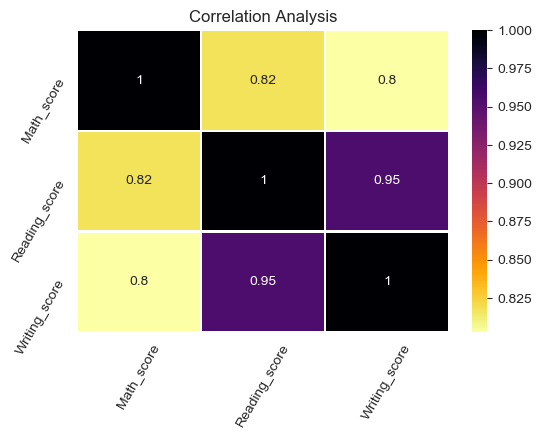

In [45]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(data.corr(),annot=True,lw=1,linecolor='white',cmap='inferno_r')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()